In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import h5py

import sys
sys.path.append('../')
import analysis_utils as utils
utils.load_plotting_setting()

import calc_gas_collision_spectrum as calc_gas

In [2]:
import importlib
importlib.reload(utils)
importlib.reload(calc_gas)

<module 'calc_gas_collision_spectrum' from '/Users/yuhan/work/nanospheres/gas_collisiions/analysis_notebooks/../calc_gas_collision_spectrum.py'>

In [3]:
amp2kev = 8171.343370691745

def read_recon(file):
    f = h5py.File(file, 'r')

    amps = f['data_processed']['amplitude'][:]
    good_detection = f['data_processed']['good_detection'][:]
    noise_level_amp = f['data_processed']['noise_level_amp'][:]
    chi2 = f['data_processed']['chisquare'][:]

    f.close()

    return amps, good_detection, noise_level_amp, chi2

def get_summed_histogram(dataset, type, file_prefix, nfiles, noise_threshold_kev=200):
    bins = np.arange(0, 10000, 25)  # keV
    bc = 0.5 * (bins[:-1] + bins[1:])

    hh_all = np.zeros_like(bc, dtype=np.int64)
    pressures = []
    for i in range(nfiles):
        file = rf'/Users/yuhan/work/nanospheres/data/gas_data_processed/sphere_20251212/{type}/{dataset}/{file_prefix}{i}_processed.hdf5'
        amps, good_detection, noise_level_amp, chi2 = read_recon(file)

        good_window = np.logical_and(good_detection, noise_level_amp*amp2kev < noise_threshold_kev)
        _hh, _ = np.histogram(np.abs(amps[good_window].flatten()) * amp2kev, bins)
        hh_all += _hh

    return bc, hh_all

In [ ]:
def get_average_pressure(dataset, type, file_prefix, nfiles):
    sphere = 'sphere_20251212'
    data_dir = rf'/Volumes/LaCie/gas_collisions/{type}/{sphere}/{dataset}'

    pressures = np.empty(nfiles)
    for i in range(nfiles):
        file = os.path.join(data_dir, f'{file_prefix}{i}.hdf5')
        f = h5py.File(file, "r")

        pressures[i] = f['data'].attrs['pressure_mbar']

    return np.mean(pressures)

#### First check the noise level and chi2 values

In [4]:
dataset = '20251218_p8e_7e-8mbar_noinjection'
file_prefix = '20251218_df_'
type = 'background_data'
nfiles = 5

amps_all, good_detection_all, noise_level_all, chi2_all = [], [], [], []
for i in range(nfiles):
    file = rf'/Users/yuhan/work/nanospheres/data/gas_data_processed/sphere_20251212/{type}/{dataset}/{file_prefix}{i}_processed.hdf5'
    amps, good_detection, noise_level_amp, chi2 = read_recon(file)

    amps_all.append(amps)
    good_detection_all.append(good_detection)
    noise_level_all.append(noise_level_amp)
    chi2_all.append(chi2)


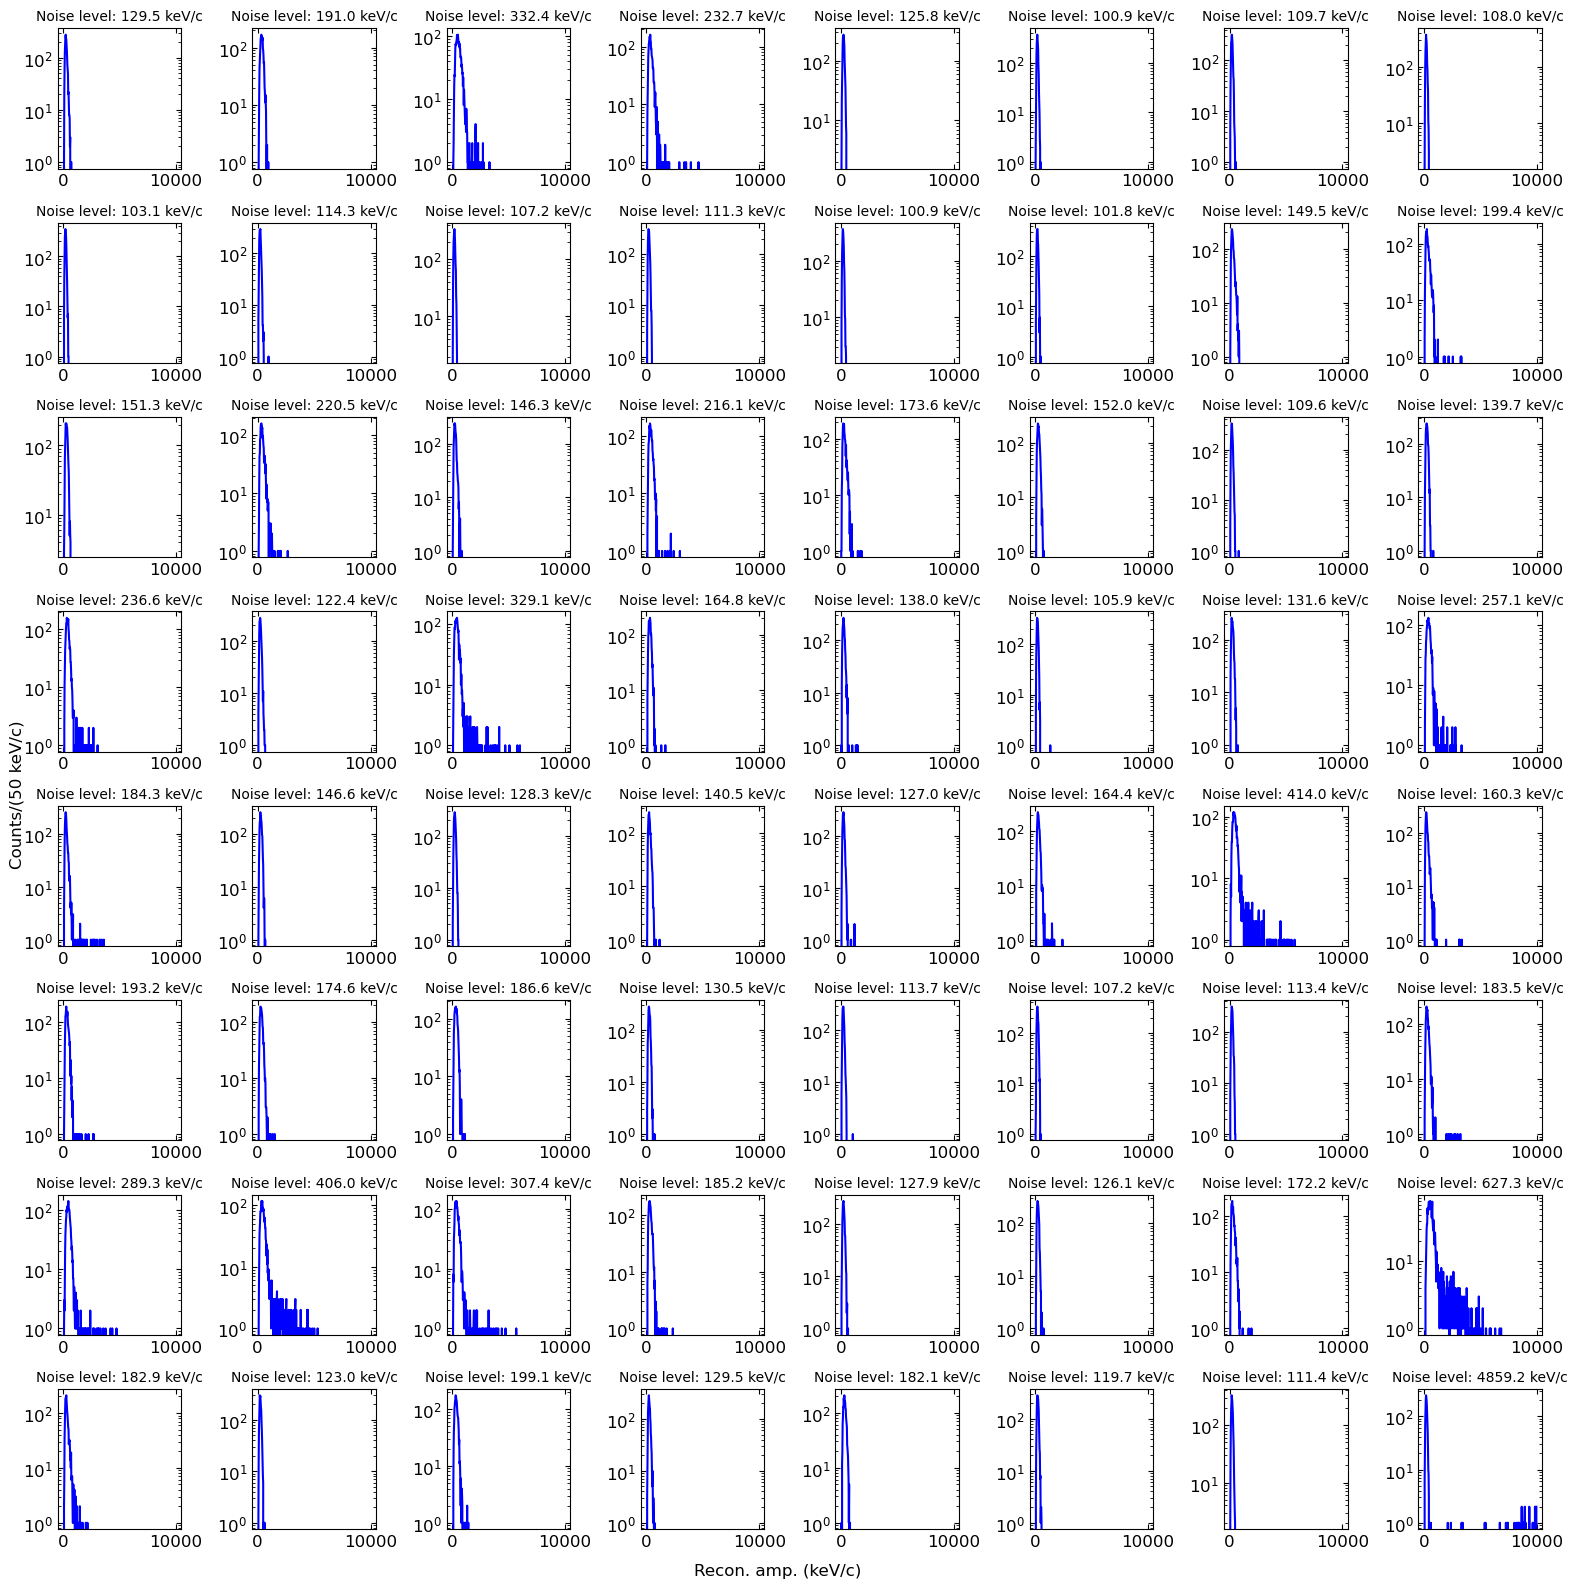

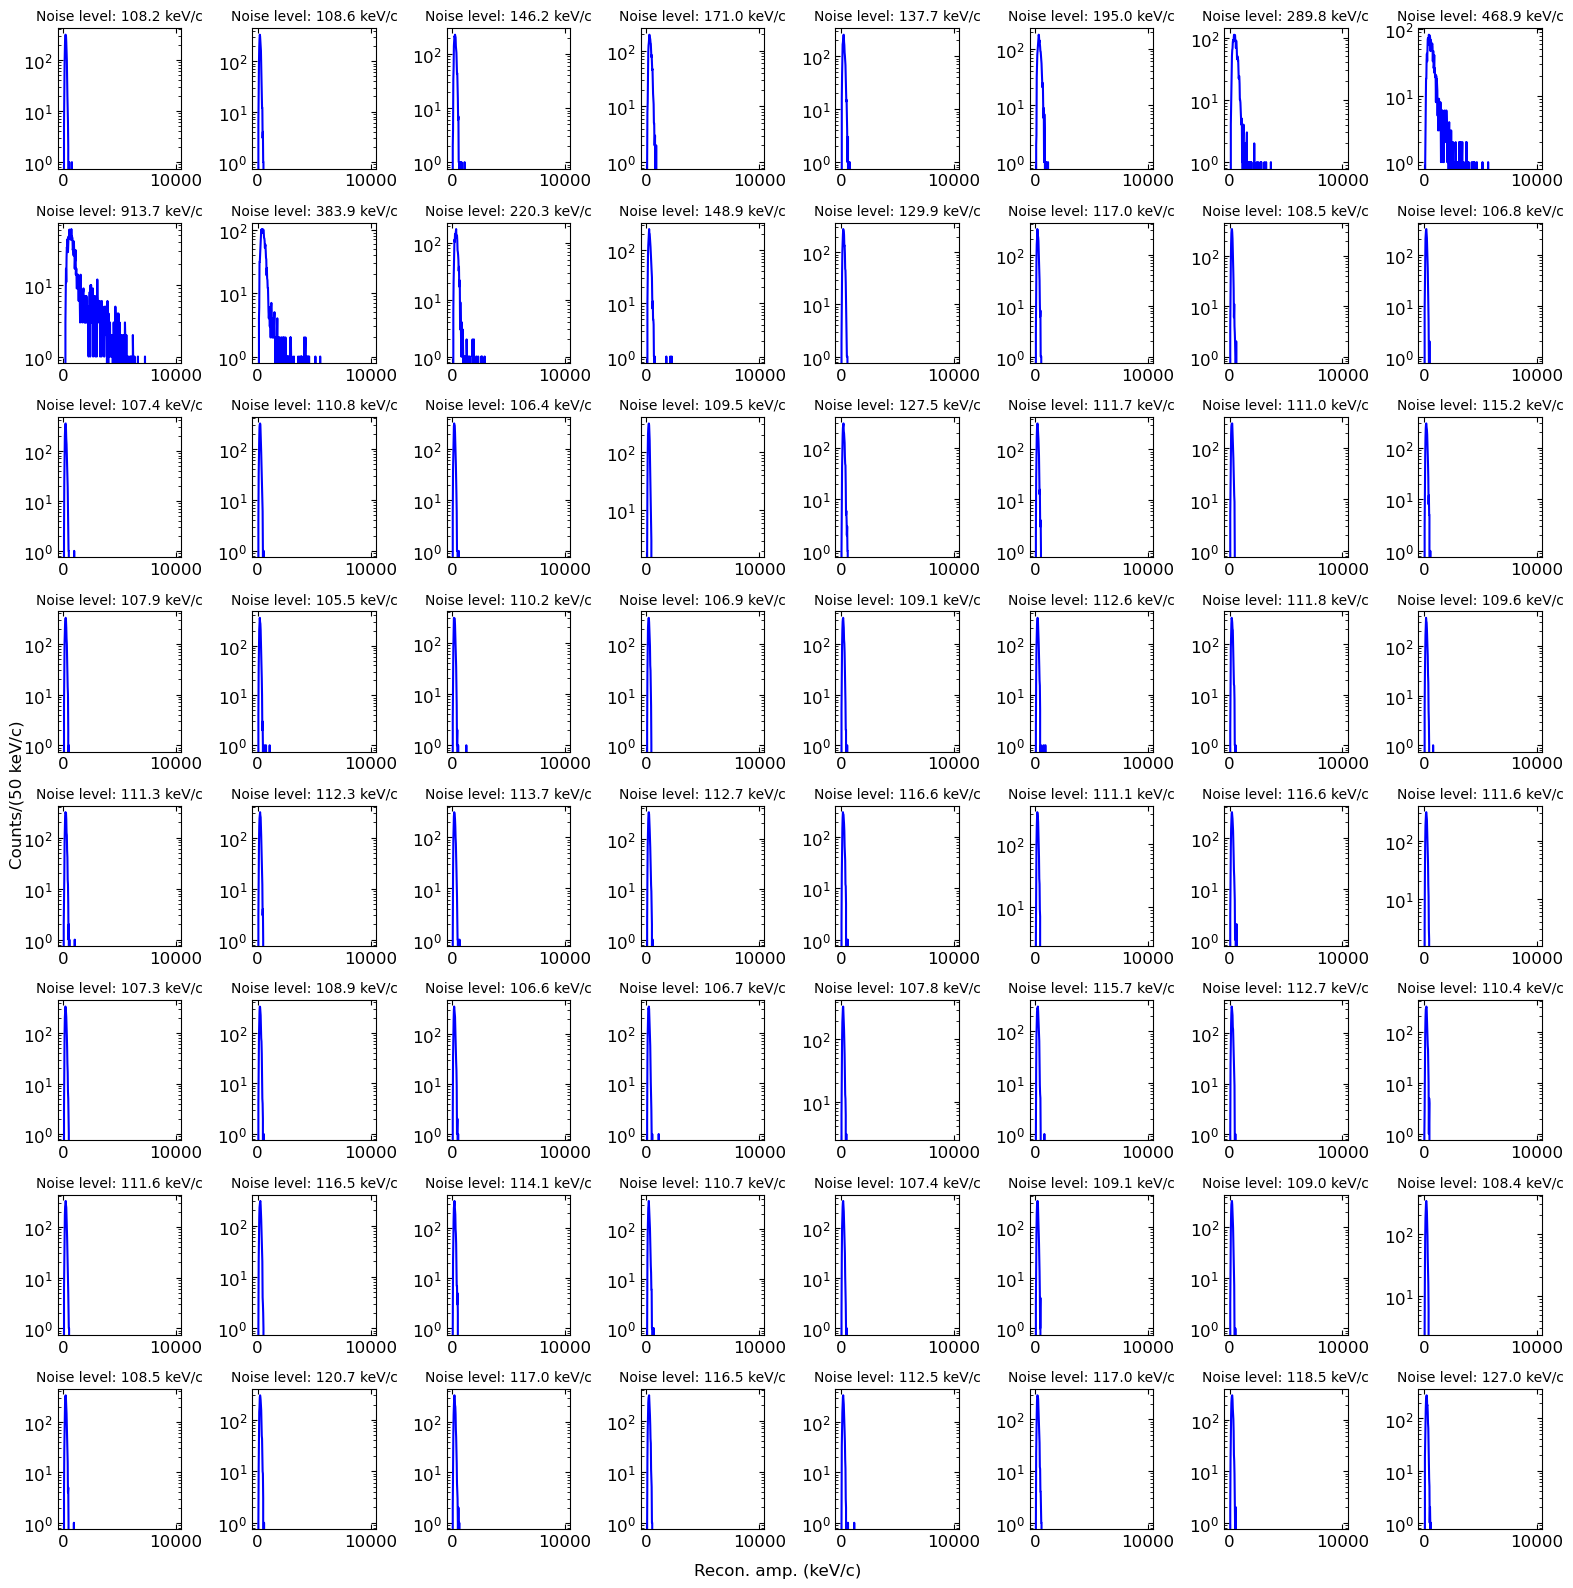

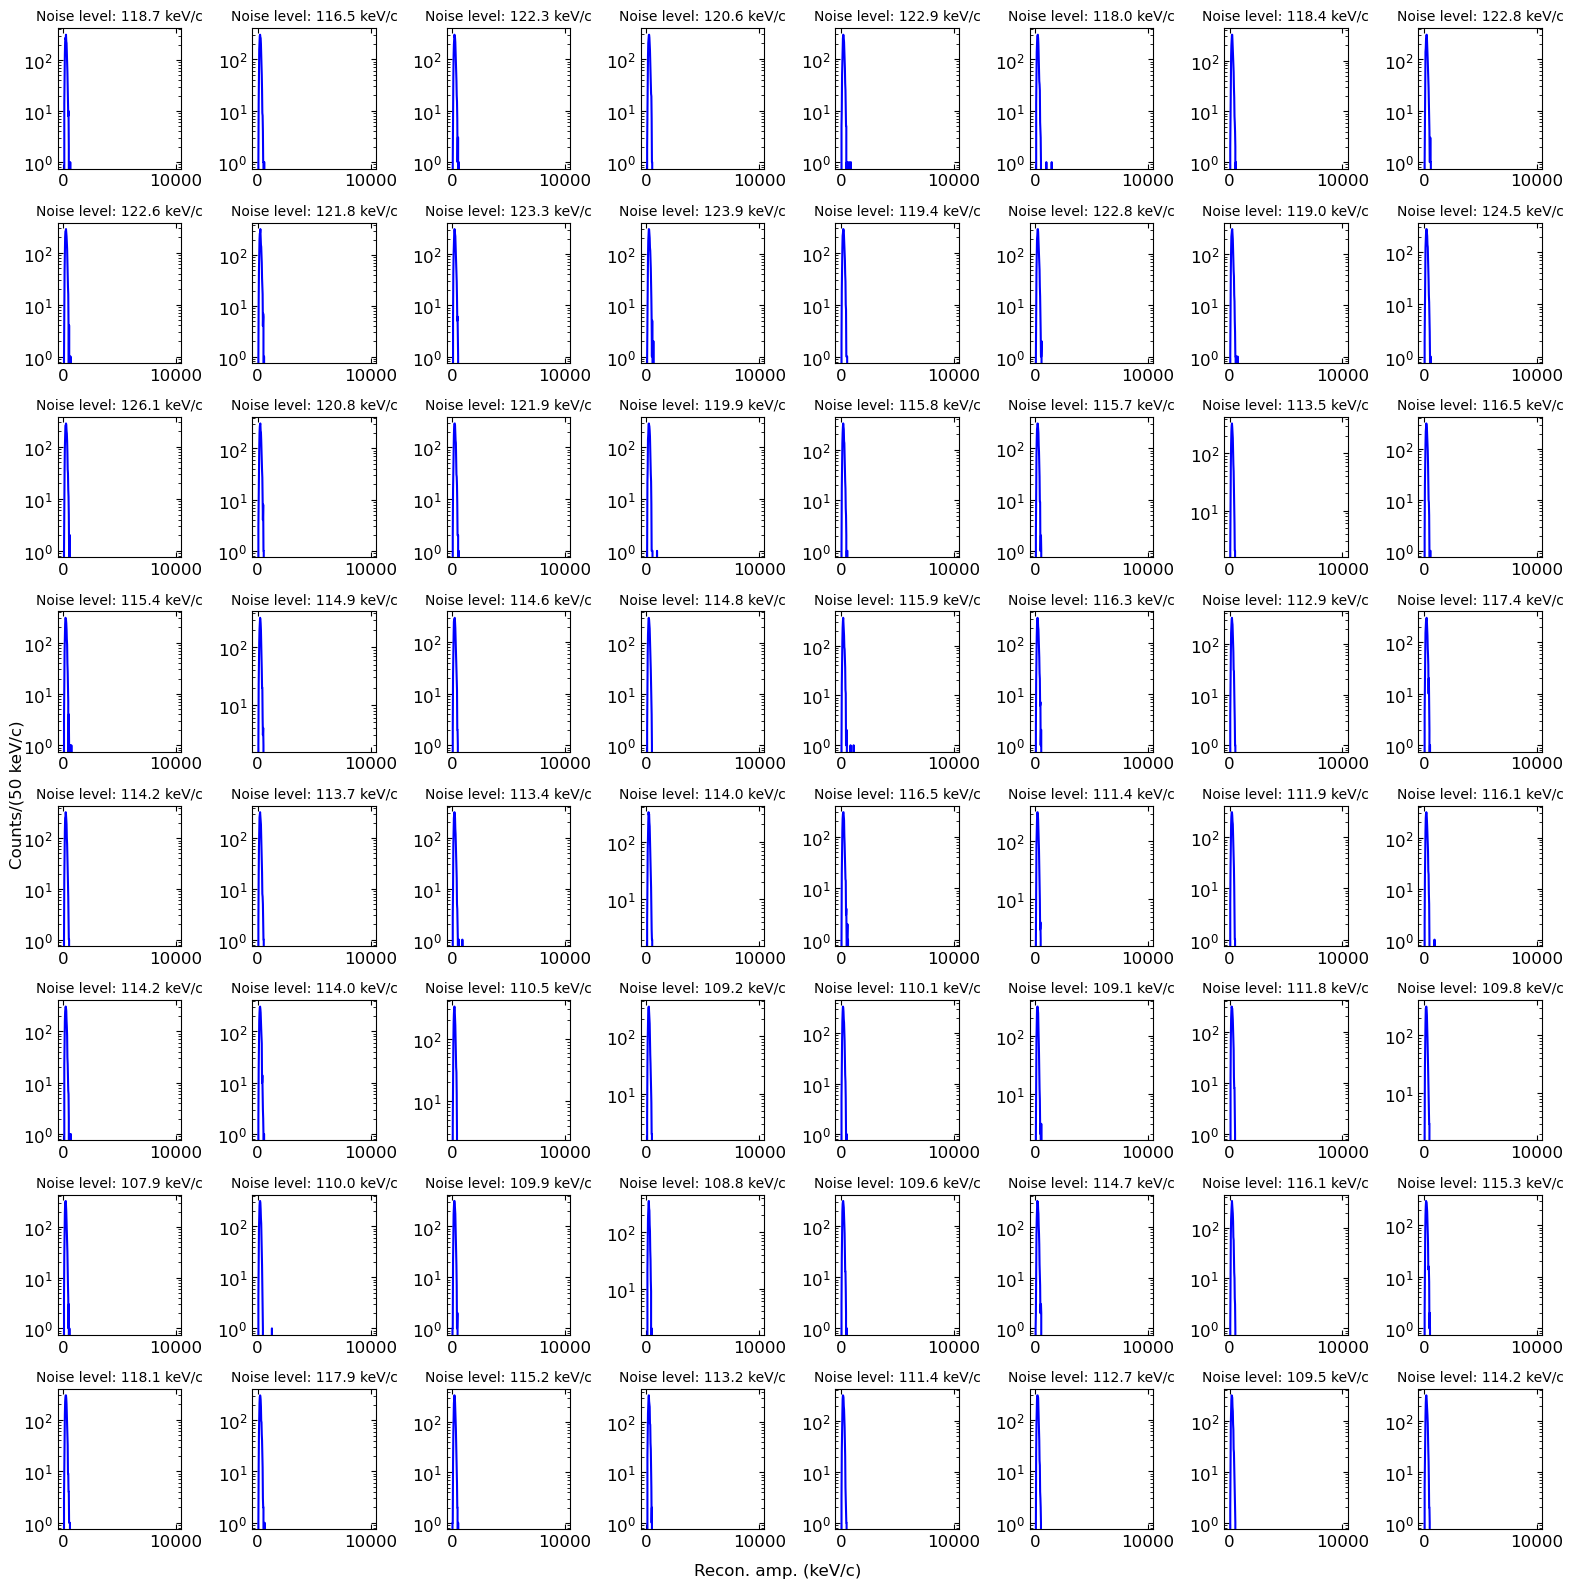

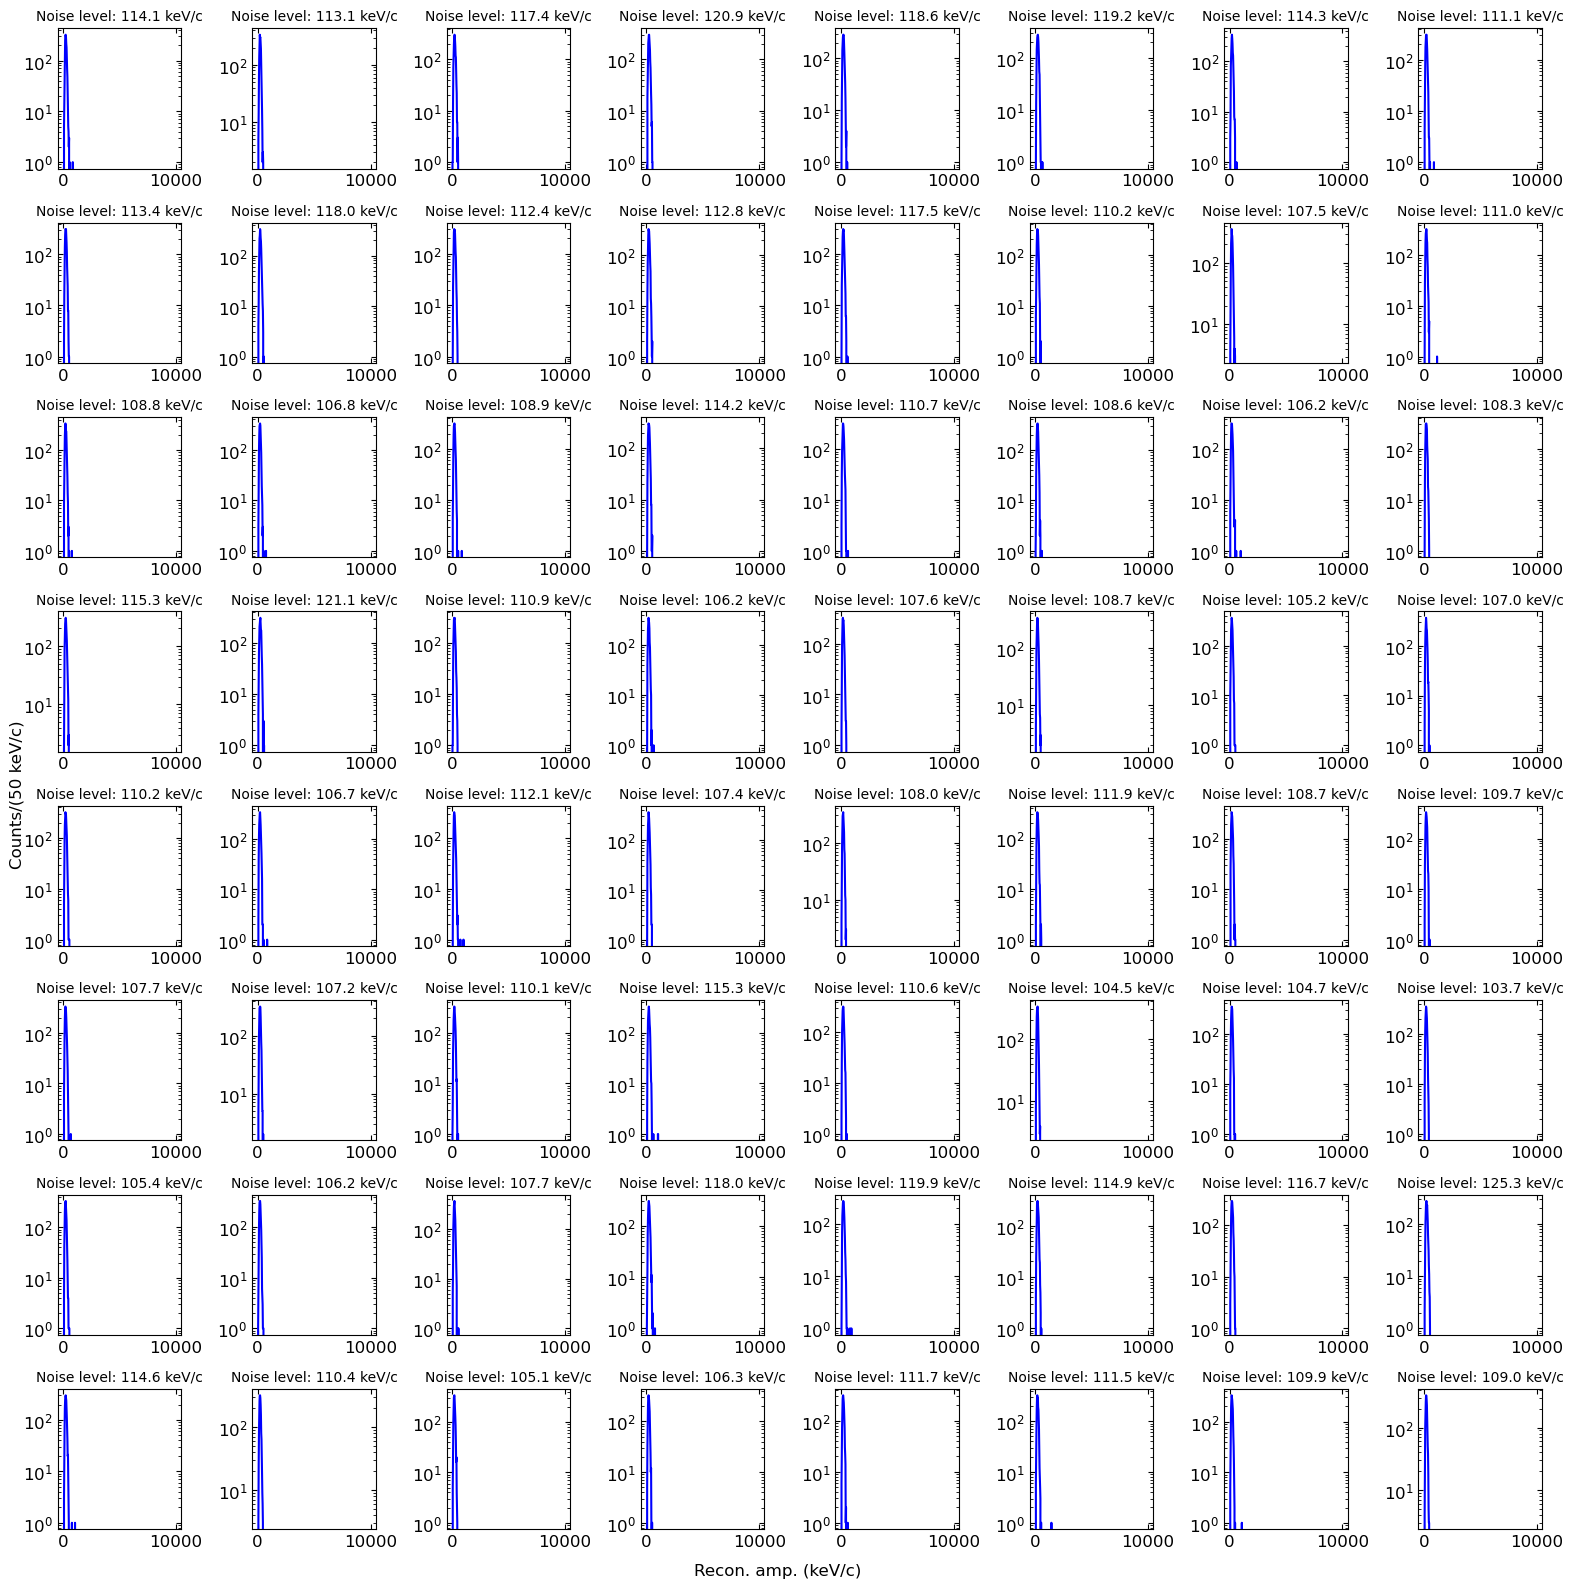

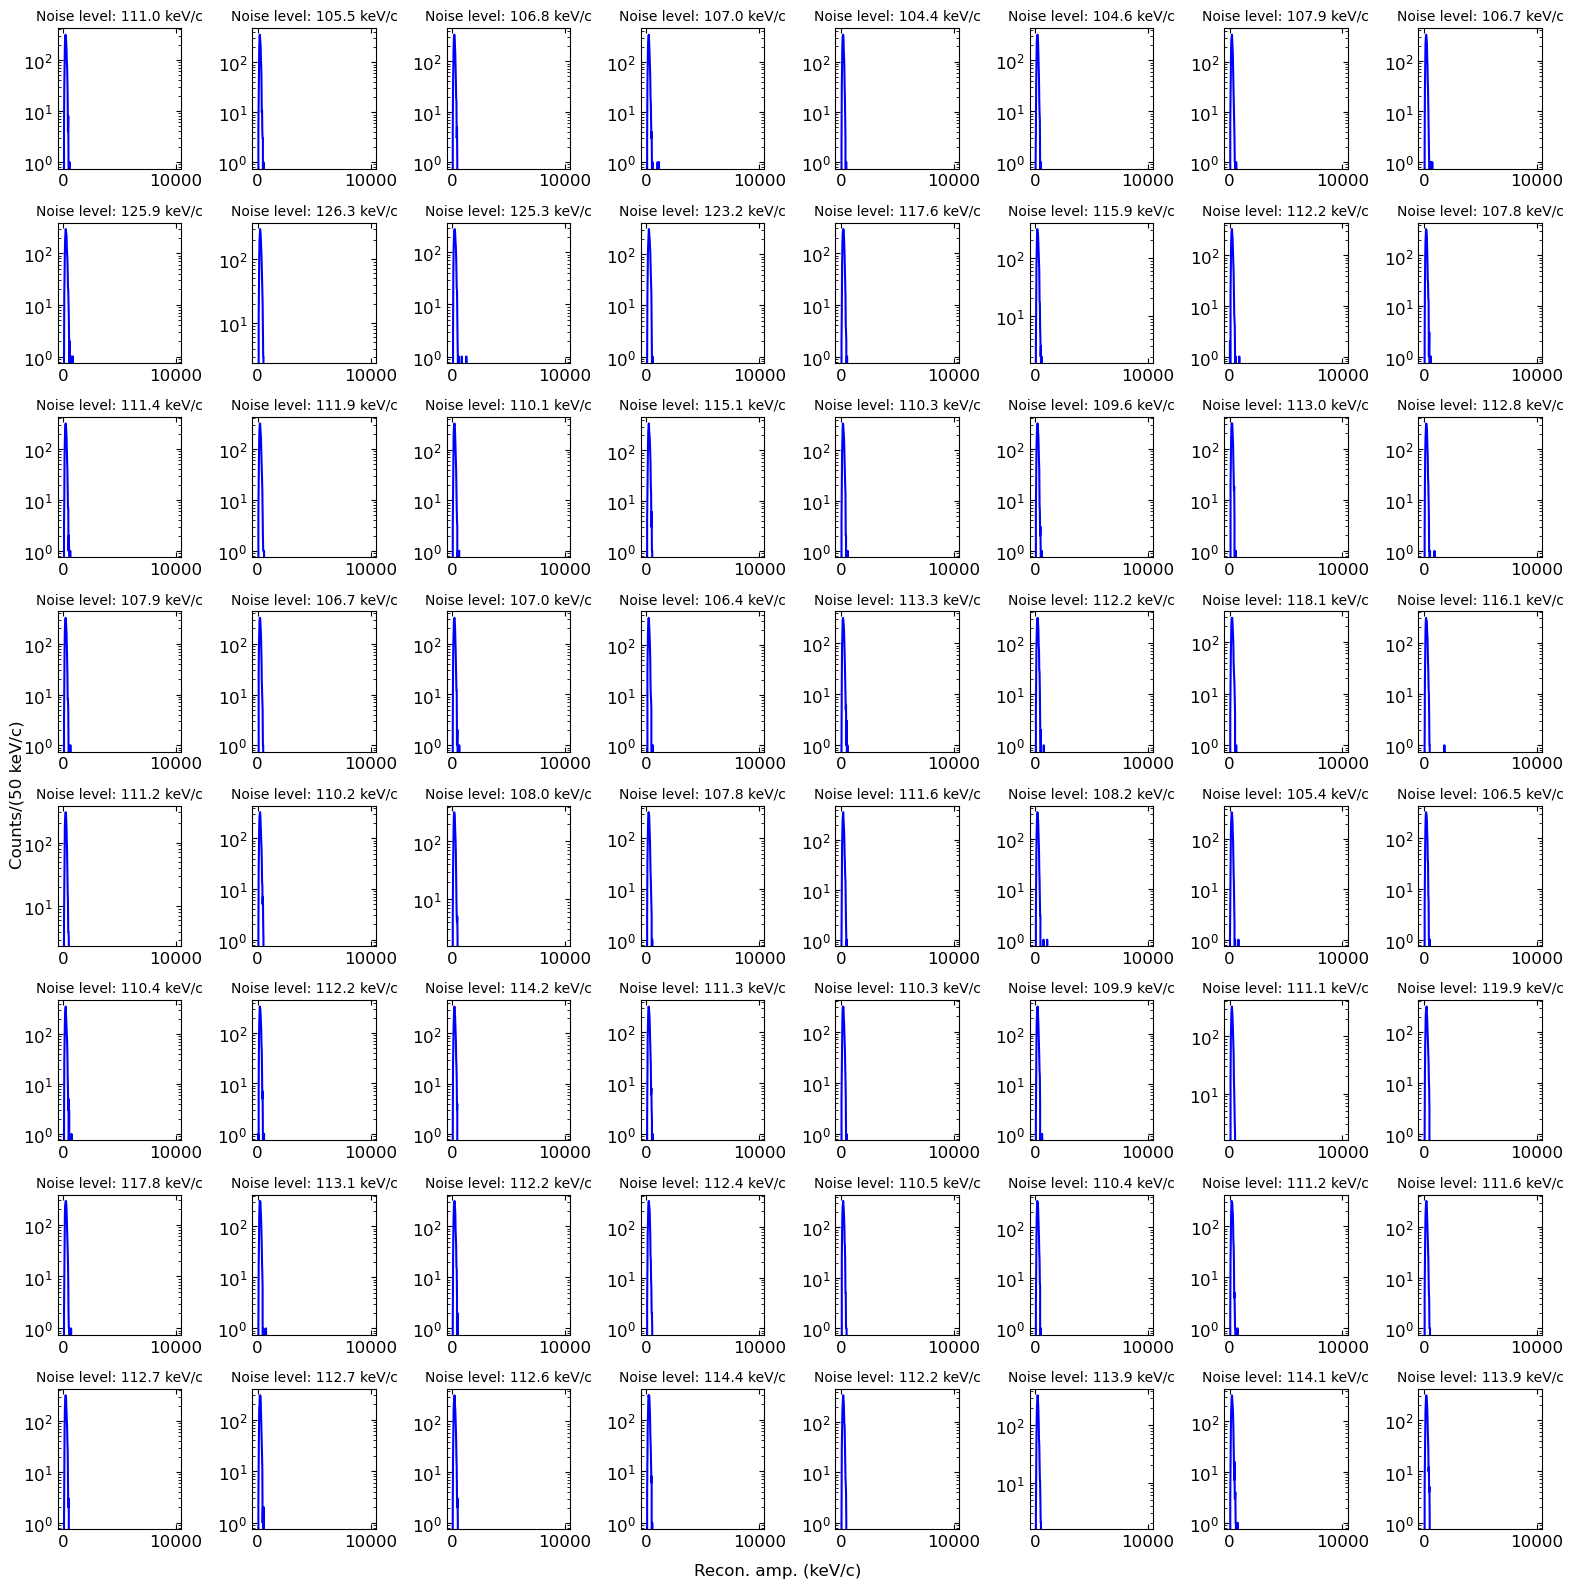

In [6]:
bins = np.arange(0, 10000, 25)  # keV
bc = 0.5 * (bins[:-1] + bins[1:])

for j in range(nfiles):
    fig, axes = plt.subplots(8, 8, figsize=(16, 16))

    for i in range(64):
        _hh, _ = np.histogram(np.abs(amps_all[j][i].flatten()) * amp2kev, bins)

        ax = axes[i//8][i%8]
        ax.plot(bc, _hh, 'b')
        ax.set_yscale('log')
        ax.set_title(f'Noise level: {noise_level_all[j][i] * amp2kev:.1f} keV/c', fontsize=10)

    fig.supxlabel('Recon. amp. (keV/c)')
    fig.supylabel('Counts/(50 keV/c)')
    fig.tight_layout()


In [ ]:
bc, hh_all_bg_0 = get_summed_histogram('20251215_p8e_5e-8mbar', 'background_data', '20251215_df_', 150, 200)
bc, hh_all_bg_1 = get_summed_histogram('20251216_unknown_5e-8mbar_cryopumped', 'background_data', '20251216_df_', 300, 200)
bc, hh_all_bg_2 = get_summed_histogram('20251218_p8e_7e-8mbar_noinjection', 'background_data', '20251218_df_', 300, 200)
bc, hh_all_bg_3 = get_summed_histogram('20251218_p8e_1e-7mbar_noinjection', 'background_data', '20251218_df_', 300, 200)
bc, hh_all_bg_4 = get_summed_histogram('20251216_unknown_6e-8mbar_cryopumped', 'background_data', '20251216_df_', 300, 200)
bc, hh_all_bg_5 = get_summed_histogram('20251217_unknown_5e-8mbar_kryptonpumped', 'background_data', '20251217_df_', 300, 200)

In [8]:
bc, hh_all_xe_0 = get_summed_histogram('20251216_unknown_5e-8mbar', 'xenon_data', '20251216_df_', 300, 200)
bc, hh_all_xe_1 = get_summed_histogram('20251216_unknown_8e-8mbar', 'xenon_data', '20251216_df_', 300, 200)
bc, hh_all_xe_2 = get_summed_histogram('20251216_unknown_2e-7mbar', 'xenon_data', '20251216_df_', 300, 200)
bc, hh_all_xe_3 = get_summed_histogram('20251215_p8e_2e-7mbar', 'xenon_data', '20251215_df_', 400, 200)

In [10]:
bc, hh_all_kr_0 = get_summed_histogram('20251217_unknown_5e-8mbar', 'krypton_data', '20251217_df_', 300, 200)
bc, hh_all_kr_1 = get_summed_histogram('20251217_unknown_7e-8mbar', 'krypton_data', '20251217_df_', 300, 200)
bc, hh_all_kr_2 = get_summed_histogram('20251217_unknown_2e-7mbar', 'krypton_data', '20251217_df_', 300, 200)

In [12]:
p_bg_0 = get_average_pressure('20251215_p8e_5e-8mbar', 'background_data', '20251215_df_', 150)
p_bg_1 = get_average_pressure('20251216_unknown_5e-8mbar_cryopumped', 'background_data', '20251216_df_', 300)
p_bg_2 = get_average_pressure('20251218_p8e_7e-8mbar_noinjection', 'background_data', '20251218_df_', 300)
p_bg_3 = get_average_pressure('20251218_p8e_1e-7mbar_noinjection', 'background_data', '20251218_df_', 300)
p_bg_4 = get_average_pressure('20251216_unknown_6e-8mbar_cryopumped', 'background_data', '20251216_df_', 300)
p_bg_5 = get_average_pressure('20251217_unknown_5e-8mbar_kryptonpumped', 'background_data', '20251217_df_', 300)

p_xe_0 = get_average_pressure('20251216_unknown_5e-8mbar', 'xenon_data', '20251216_df_', 300)
p_xe_1 = get_average_pressure('20251216_unknown_8e-8mbar', 'xenon_data', '20251216_df_', 300)
p_xe_2 = get_average_pressure('20251216_unknown_2e-7mbar', 'xenon_data', '20251216_df_', 300)
p_xe_3 = get_average_pressure('20251215_p8e_2e-7mbar', 'xenon_data', '20251215_df_', 400)

p_xe_effective = np.concatenate( [(np.asarray([p_xe_0, p_xe_1, p_xe_2]) - p_bg_1) * 0.4, np.asarray([(p_xe_3 - p_bg_0) * 0.4])])

In [13]:
p_kr_0 = get_average_pressure('20251217_unknown_5e-8mbar', 'krypton_data', '20251217_df_', 300)
p_kr_1 = get_average_pressure('20251217_unknown_7e-8mbar', 'krypton_data', '20251217_df_', 300)
p_kr_2 = get_average_pressure('20251217_unknown_2e-7mbar', 'krypton_data', '20251217_df_', 300)

p_kr_effective = (np.asarray([p_kr_0, p_kr_1, p_kr_2]) - p_bg_5) * 0.5

Text(0, 0.5, 'Counts/(50 keV/c)/s')

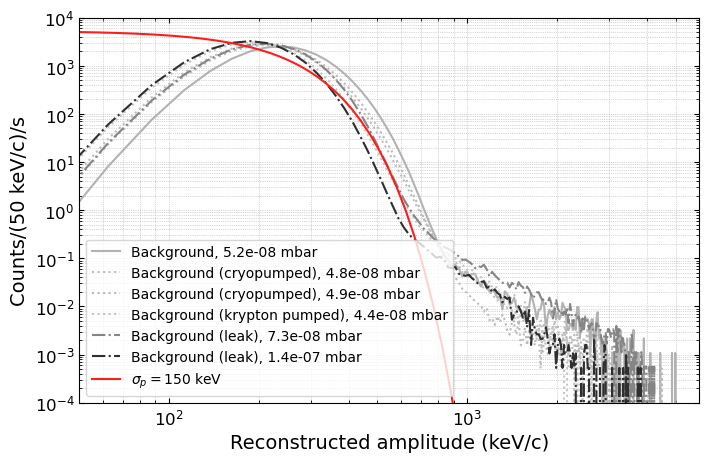

In [36]:
cmap = plt.colormaps.get_cmap('Greys')
colors_bg = cmap((np.log(np.asarray([p_bg_0, p_bg_1, p_bg_2, p_bg_3, p_bg_4, p_bg_5])) - np.log(2e-8)) / (np.log(2e-7) - np.log(2e-8)))

plt.figure(figsize=(8, 5))
plt.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors_bg[0], label=f'Background, {p_bg_0:.1e} mbar')
plt.plot(bc, hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), color=colors_bg[1], label=f'Background (cryopumped), {p_bg_1:.1e} mbar', linestyle=':')
plt.plot(bc, hh_all_bg_4/(50e-6 * np.sum(hh_all_bg_4)), color=colors_bg[4], label=f'Background (cryopumped), {p_bg_4:.1e} mbar', linestyle=':')
plt.plot(bc, hh_all_bg_5/(50e-6 * np.sum(hh_all_bg_5)), color=colors_bg[5], label=f'Background (krypton pumped), {p_bg_5:.1e} mbar', linestyle=':')
plt.plot(bc, hh_all_bg_2/(50e-6 * np.sum(hh_all_bg_2)), color=colors_bg[2], label=f'Background (leak), {p_bg_2:.1e} mbar', linestyle='-.')
plt.plot(bc, hh_all_bg_3/(50e-6 * np.sum(hh_all_bg_3)), color=colors_bg[3], label=f'Background (leak), {p_bg_3:.1e} mbar', linestyle='-.')

sigma = 150
xx = np.logspace(-2, 4, 200)
half_gauss_amp = 50 * 2 * np.sum(hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0))) / (sigma * np.sqrt(2 * np.pi))
plt.plot(xx, utils.gauss(xx, half_gauss_amp, 0, sigma), '-', color='#FD1D1D', label=rf'$\sigma_p=${sigma} keV')

plt.xlim(50, 6000)
plt.ylim(1e-4, 1e4)
plt.yscale('log')
plt.xscale('log')
plt.grid(which='both', ls=':', linewidth=0.5)

plt.legend(fontsize=10, loc=3)

plt.xlabel('Reconstructed amplitude (keV/c)')
plt.ylabel('Counts/(50 keV/c)/s')


In [176]:
sig_p_kev = 106.59846459575695

qq_kev = np.linspace(1, 10000, 10000)

dr_dq_diffuse_xe = calc_gas.dgamma_dp_diffuse(qq_kev, calc_gas.A, 131.3, 5e-8, 293, 1000)
dr_dq_xe = calc_gas.dgamma_dp(qq_kev, calc_gas.A, 131.3, 5e-8, 1, 293)

qqz, drdqz = calc_gas.get_drdqz(qq_kev, dr_dq_xe)
qqz, drdqz_diffuse = calc_gas.get_drdqz(qq_kev, dr_dq_diffuse_xe)

qqzn, drdqzn_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz, sig_p_kev)
qqzn, drdqzn_diffuse_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz_diffuse, sig_p_kev)

# qqzn, drdqzn_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz, 150)
# qqzn, drdqzn_diffuse_xe = calc_gas.smear_drdqz_gauss(qqz, drdqz_diffuse, 150)

Text(0, 0.5, 'Counts/(50 keV/c)/s')

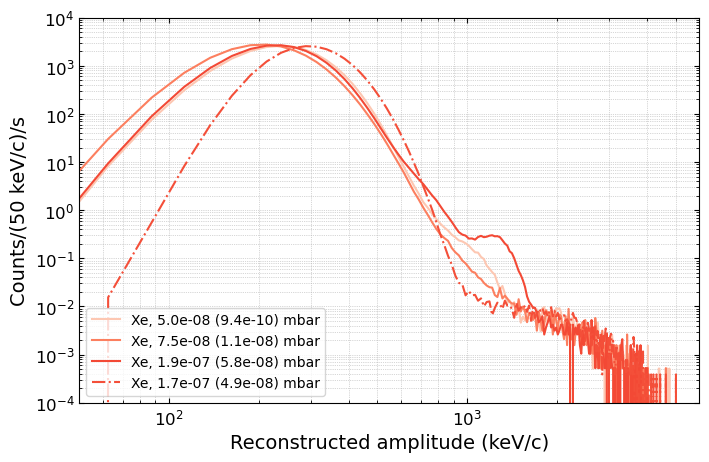

In [37]:
cmap = plt.colormaps.get_cmap('Reds')
colors_xe = cmap((np.log(p_xe_effective) - np.log(1e-10)) / (np.log(5e-6) - np.log(1e-10)))

plt.figure(figsize=(8, 5))
plt.plot(bc, hh_all_xe_0/(50e-6 * np.sum(hh_all_xe_0)), color=colors_xe[0], label=f'Xe, {p_xe_0:.1e} ({p_xe_effective[0]:.1e}) mbar')
plt.plot(bc, hh_all_xe_1/(50e-6 * np.sum(hh_all_xe_1)), color=colors_xe[1], label=f'Xe, {p_xe_1:.1e} ({p_xe_effective[1]:.1e}) mbar')
plt.plot(bc, hh_all_xe_2/(50e-6 * np.sum(hh_all_xe_2)), color=colors_xe[2], label=f'Xe, {p_xe_2:.1e} ({p_xe_effective[2]:.1e}) mbar')
plt.plot(bc, hh_all_xe_3/(50e-6 * np.sum(hh_all_xe_3)), color=colors_xe[3], linestyle='-.', label=f'Xe, {p_xe_3:.1e} ({p_xe_effective[3]:.1e}) mbar')

# plt.plot(qq_kev, drdqzn_xe*50, 'b', label='Theory, Xe@5e-8 mbar')
# plt.plot(qq_kev, drdqzn_diffuse_xe*50, 'b--', label='Theory, Xe@5e-8 mbar')

plt.xlim(50, 6000)
plt.ylim(1e-4, 1e4)
plt.yscale('log')
plt.xscale('log')

plt.grid(which='both', ls=':', linewidth=0.5)
plt.legend(fontsize=10, loc=3)

plt.xlabel('Reconstructed amplitude (keV/c)')
plt.ylabel('Counts/(50 keV/c)/s')


Text(0, 0.5, 'Counts/(50 keV/c)/s')

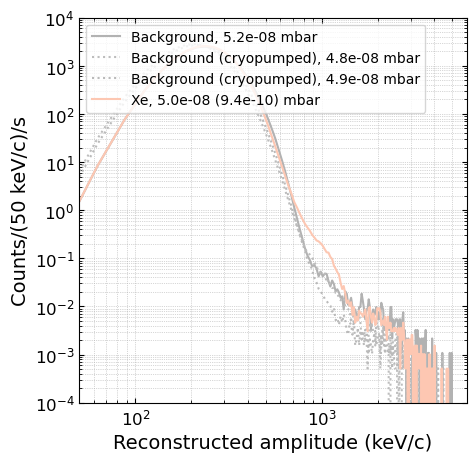

In [39]:
plt.figure(figsize=(5, 5))




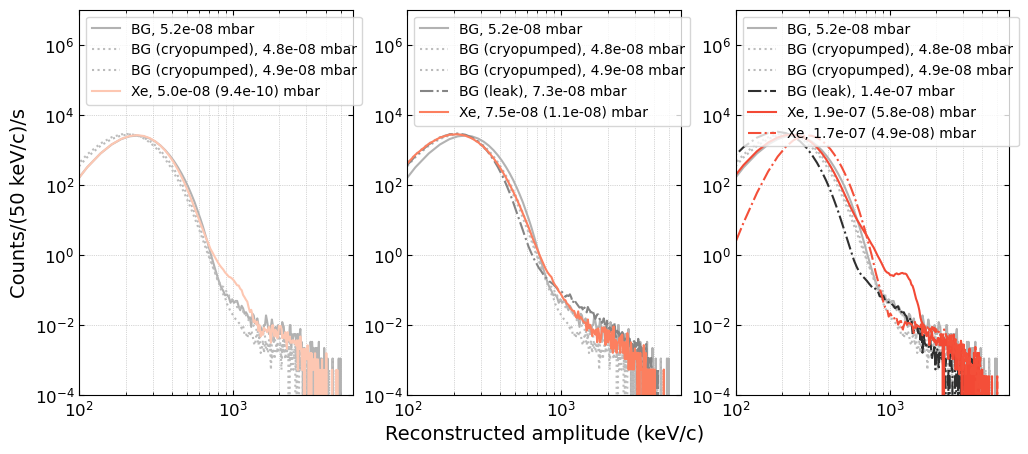

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

ax = axes[0]
ax.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors_bg[0], label=f'BG, {p_bg_0:.1e} mbar')
ax.plot(bc, hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), color=colors_bg[1], label=f'BG (cryopumped), {p_bg_1:.1e} mbar', linestyle=':')
ax.plot(bc, hh_all_bg_4/(50e-6 * np.sum(hh_all_bg_4)), color=colors_bg[4], label=f'BG (cryopumped), {p_bg_4:.1e} mbar', linestyle=':')

ax.plot(bc, hh_all_xe_0/(50e-6 * np.sum(hh_all_xe_0)), color=colors_xe[0], label=f'Xe, {p_xe_0:.1e} ({p_xe_effective[0]:.1e}) mbar')
ax.set_ylabel('Counts/(50 keV/c)/s')

ax = axes[1]
ax.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors_bg[0], label=f'BG, {p_bg_0:.1e} mbar')
ax.plot(bc, hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), color=colors_bg[1], label=f'BG (cryopumped), {p_bg_1:.1e} mbar', linestyle=':')
ax.plot(bc, hh_all_bg_4/(50e-6 * np.sum(hh_all_bg_4)), color=colors_bg[4], label=f'BG (cryopumped), {p_bg_4:.1e} mbar', linestyle=':')
ax.plot(bc, hh_all_bg_2/(50e-6 * np.sum(hh_all_bg_2)), color=colors_bg[2], label=f'BG (leak), {p_bg_2:.1e} mbar', linestyle='-.')
ax.plot(bc, hh_all_xe_1/(50e-6 * np.sum(hh_all_xe_1)), color=colors_xe[1], label=f'Xe, {p_xe_1:.1e} ({p_xe_effective[1]:.1e}) mbar')

ax.set_xlabel('Reconstructed amplitude (keV/c)')

ax = axes[2]
ax.plot(bc, hh_all_bg_0/(50e-6 * np.sum(hh_all_bg_0)), color=colors_bg[0], label=f'BG, {p_bg_0:.1e} mbar')
ax.plot(bc, hh_all_bg_1/(50e-6 * np.sum(hh_all_bg_1)), color=colors_bg[1], label=f'BG (cryopumped), {p_bg_1:.1e} mbar', linestyle=':')
ax.plot(bc, hh_all_bg_4/(50e-6 * np.sum(hh_all_bg_4)), color=colors_bg[4], label=f'BG (cryopumped), {p_bg_4:.1e} mbar', linestyle=':')
ax.plot(bc, hh_all_bg_3/(50e-6 * np.sum(hh_all_bg_3)), color=colors_bg[3], label=f'BG (leak), {p_bg_3:.1e} mbar', linestyle='-.')

ax.plot(bc, hh_all_xe_2/(50e-6 * np.sum(hh_all_xe_2)), color=colors_xe[2], label=f'Xe, {p_xe_2:.1e} ({p_xe_effective[2]:.1e}) mbar')
ax.plot(bc, hh_all_xe_3/(50e-6 * np.sum(hh_all_xe_3)), color=colors_xe[3], label=f'Xe, {p_xe_3:.1e} ({p_xe_effective[3]:.1e}) mbar', linestyle='-.')

for ax in axes:
    ax.set_xlim(100, 6000)
    ax.set_ylim(1e-4, 1e7)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.grid(which='both', ls=':', linewidth=0.5)
    ax.legend(fontsize=10, loc=2)


In [ ]:
sig_p_kev = 106.59846459575695

qq_kev = np.linspace(1, 10000, 10000)

dr_dq_diffuse_xe = calc_gas.dgamma_dp_diffuse(qq_kev, calc_gas.A, 131.3, 5e-8, 293, 1000)
dr_dq_xe = calc_gas.dgamma_dp(qq_kev, calc_gas.A, 131.3, 5e-8, 1, 293)

qqz, drdqz = calc_gas.get_drdqz(qq_kev, dr_dq_xe)
qqz, drdqz_diffuse = calc_gas.get_drdqz(qq_kev, dr_dq_diffuse_xe)

qqzn, drdqzn = calc_gas.smear_drdqz_gauss(qqz, drdqz, sig_p_kev)
qqzn, drdqzn_diffuse = calc_gas.smear_drdqz_gauss(qqz, drdqz_diffuse, sig_p_kev)

# qqzn, drdqzn = calc_gas.smear_drdqz_gauss(qqz, drdqz, 150)
# qqzn, drdqzn_diffuse = calc_gas.smear_drdqz_gauss(qqz, drdqz_diffuse, 150)

Text(0, 0.5, 'Counts/(50 keV/c)/s')

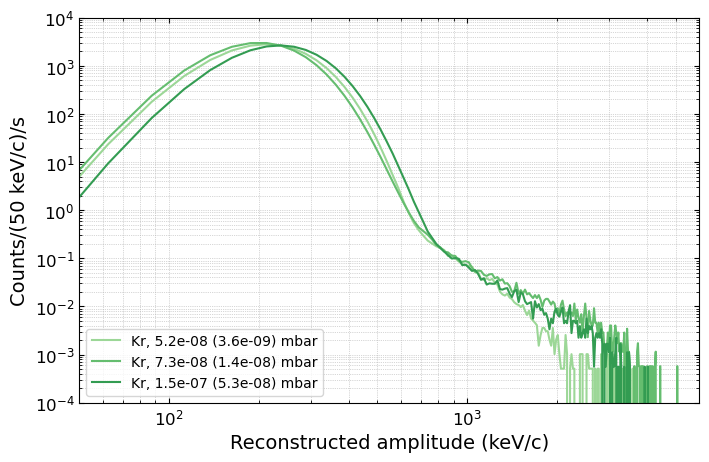

In [48]:
plt.figure(figsize=(8, 5))

cmap = plt.colormaps.get_cmap('Greens')
colors_kr = cmap((np.log(p_kr_effective) - np.log(1e-10)) / (np.log(1e-6) - np.log(1e-10)))

plt.plot(bc, hh_all_kr_0/(50e-6 * np.sum(hh_all_kr_0)), color=colors_kr[0], label=f'Kr, {p_kr_0:.1e} ({p_kr_effective[0]:.1e}) mbar')
plt.plot(bc, hh_all_kr_1/(50e-6 * np.sum(hh_all_kr_1)), color=colors_kr[1], label=f'Kr, {p_kr_1:.1e} ({p_kr_effective[1]:.1e}) mbar')
plt.plot(bc, hh_all_kr_2/(50e-6 * np.sum(hh_all_kr_2)), color=colors_kr[2], label=f'Kr, {p_kr_2:.1e} ({p_kr_effective[2]:.1e}) mbar')

plt.xlim(50, 6000)
plt.ylim(1e-4, 1e4)
plt.yscale('log')
plt.xscale('log')

plt.grid(which='both', ls=':', linewidth=0.5)
plt.legend(fontsize=10, loc=3)

plt.xlabel('Reconstructed amplitude (keV/c)')
plt.ylabel('Counts/(50 keV/c)/s')

In [49]:
2**19 * 200e-9

0.1048576